In [440]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

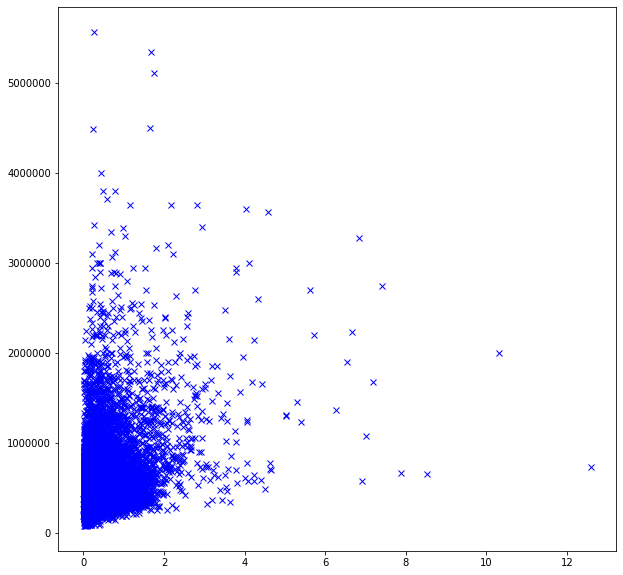

In [444]:
df = pd.read_csv('data/train_data.csv', delimiter=',')

cols = df.columns[3:-1]
numFeatures = len(cols)

df = df.dropna(subset=cols) #drop na cells 
df = df[df.bedrooms <= 15]
df = df[df.sqft_lot <= 1250000]
df = df[df.sqft_above <= 7000]
df = df[df.sqft_basement <= 3500]
df = df[df.sqft_lot15 <= 500000]

scores = []
for i in df['yr_renovated']:
    if i != 0:
        scores.append((i - 2015) + 82)
    else:
        scores.append(0)
df['renovation_score'] = scores

landvalue = []
view = list(df['view'])
water = list(df['waterfront'])
living = list(df['sqft_living'])
lot = list(df['sqft_lot'])
for i in range(len(water)):
    value = (view[i] + 1) * living[i]
    if water[i] == 1:
        value  = value * 2
    value = value / lot[i]
    landvalue.append(value)
df['landvalue'] = landvalue

fig, axes = plt.subplots(1,1, figsize = (10,10))
fig.subplots_adjust(wspace = 0.3, hspace = 0.5)
axes.plot(landvalue, df['price'], 'bx')

centerpoint= (47.628591, -122.289796)  #center point of city center
dist_df = df.loc[:,['Unique_idx','lat','long','price']]
dist_df['dist_latLon'] = np.sqrt(np.square(dist_df['lat']- centerpoint[0]) + np.square(dist_df['long']-centerpoint[1]))
df['distFromSeattle'] = dist_df['dist_latLon']
# df = df.drop(['lat', 'long'], axis=1)


#202272.96564043706
cols1 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'price']

#193483.43463007256
cols2 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','landvalue','waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'distFromSeattle', 'zipcode', 'lat', 'long', 'yr_renovated', 'renovation_score', 'sqft_living15', 'sqft_lot15', 'price']

#200158.15498220024
cols3 = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','landvalue', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'distFromSeattle', 'renovation_score', 'sqft_living15', 'sqft_lot15', 'price']

#193457.65473495208
cols4 = ['bedrooms', 'bathrooms', 'landvalue', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'distFromSeattle', 'renovation_score', 'sqft_living15', 'sqft_lot15', 'price']


df_train1 = df.loc[:,cols1]
df_train2 = df.loc[:,cols2]
df_train3 = df.loc[:,cols3]
df_train4 = df.loc[:,cols4]

In [445]:
# train_df = pd.read_csv('./data/train_data.csv')
# val_df = pd.read_csv('./data/val_data.csv')
# sample_df = pd.read_csv('./data/sample_submission.csv')

percent = 0.7  #choose percent to split 
n= df_train1.shape[0] #number of rows in data set before splitting
s= math.floor(percent * n)
y= df_train1.iloc[0:s,-1]
X = df_train1.iloc[0:s,:-1]

y_test= df_train1.iloc[s:n,-1]
X_test = df_train1.iloc[s:n,:-1]

In [446]:
# train_df = pd.read_csv('./data/train_data.csv')
# val_df = pd.read_csv('./data/val_data.csv')
# sample_df = pd.read_csv('./data/sample_submission.csv')

percent = 0.7  #choose percent to split 
n= df_train2.shape[0] #number of rows in data set before splitting
s= math.floor(percent * n)
y= df_train2.iloc[0:s,-1]
X = df_train2.iloc[0:s,:-1]

y_test= df_train2.iloc[s:n,-1]
X_test = df_train2.iloc[s:n,:-1]

In [447]:
# train_df = pd.read_csv('./data/train_data.csv')
# val_df = pd.read_csv('./data/val_data.csv')
# sample_df = pd.read_csv('./data/sample_submission.csv')

percent = 0.7  #choose percent to split 
n= df_train3.shape[0] #number of rows in data set before splitting
s= math.floor(percent * n)
y= df_train3.iloc[0:s,-1]
X = df_train3.iloc[0:s,:-1]

y_test= df_train3.iloc[s:n,-1]
X_test = df_train3.iloc[s:n,:-1]

In [448]:
# train_df = pd.read_csv('./data/train_data.csv')
# val_df = pd.read_csv('./data/val_data.csv')
# sample_df = pd.read_csv('./data/sample_submission.csv')

percent = 0.7  #choose percent to split 
n= df_train4.shape[0] #number of rows in data set before splitting
s= math.floor(percent * n)
y= df_train4.iloc[0:s,-1]
X = df_train4.iloc[0:s,:-1]

y_test= df_train4.iloc[s:n,-1]
X_test = df_train4.iloc[s:n,:-1]

In [449]:
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                              9832.
Date:                Wed, 12 Feb 2020   Prob (F-statistic):                        0.00
Time:                        15:29:40   Log-Likelihood:                     -1.6449e+05
No. Observations:               12098   AIC:                                  3.290e+05
Df Residuals:                   12086   BIC:                                  3.291e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
bedrooms         -3.507e+04   2563.332    -13.682      0.000   -4.01e+04      -3e+04
bathrooms         -1.23e+04   3811.170     -3.227      0.001   -1.98e+04   -4827.095
landvalue         8.991e+04   4056.009     22.167      0.000     8.2e+04    9.79e+04
condition         5.752e+04   2775.393     20.725      0.000    5.21e+04     6.3e+04
grade             7.809e+04   2741.460     28.484      0.000    7.27e+04    8.35e+04
sqft_above         187.5540      4.879     38.442      0.000     177.990     197.117
sqft_basement      157.1659      5.369     29.273      0.000     146.642     167.690
yr_built          -253.9627     10.439    -24.329      0.000    -274.424    -233.501
distFromSeattle  -9.245e+05   1.75e+04    -52.941      0.000   -9.59e+05    -8.9e+05
renovation_score  2093.7848    138.027     15.169      0.000    1823.229    2364.341
sqft_living15       66.8284      4.318     15.477      0.000      58.364      75.292
sqft_lot15           0.6879      0.073      9.433      0.000       0.545       0.831
==============================================================================
Omnibus:                     8423.623   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           348627.841
Skew:                           2.838   Prob(JB):                         0.00
Kurtosis:                      28.679   Cond. No.                     2.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [450]:
model_skl= LinearRegression().fit(X,y)
print('Rsquared(sklearn) = ', model_skl.score(X,y))
yhat_skl = model_skl.predict(X_test)
yhat_skl = yhat_skl.astype(int)
delta = yhat_skl - y_test
mse_skl = np.sqrt(np.mean(np.square(delta)))
print('mse_skl = ', mse_skl)

Rsquared(sklearn) =  0.6927788785546714
mse_skl =  208136.75140294112


In [451]:
#compare to test data
yhat = model.predict(X_test)
yhat = yhat.astype(int)
#print(y_test)
#print(yhat)
#print(np.abs(yhat-y_test))
delta = yhat - y_test
mse = np.sqrt(np.mean(np.square(delta)))
print('mse (stats model) = ', mse)

mse (stats model) =  211494.18551495395


In [436]:
#both stats model and sklearn have almost the as mse
mse/mse_skl

1.0174277120450832

In [437]:
# cols1 = ['bedrooms', 'bathrooms', 'landvalue', 'view', 'condition', 'grade', 'yr_built', 'distFromSeattle', 'yr_renovated', 'renovation_score', 'sqft_living15', 'price']
# df_train1 = df.loc[:,cols1]

# # Extract response vector y and feature matrix X from DataFrame
# y, X = df_train1.iloc[:,-1], df_train1.iloc[:,:-1]

# # Add constant to X 
# X = sm.add_constant(X)

# # Fit OLS model 
# model = sm.OLS(y, X).fit() 

# # Print model summary 
# print(model.summary())



# # X, y = make_regression(n_features=2, random_state=0)
# regr = ElasticNet(random_state=0)
# regr.fit(X, y)
# ElasticNet(random_state=0)
# print(regr.coef_)

# # print(regr.intercept_)
# y_test= df_train2.iloc[:,-1]
# yhat_elast = regr.predict(X).astype(int)
# delta = yhat_elast - y_test
# mse_elast = np.mean(np.square(delta))
# print('mse_elast = ', mse_elast)

In [438]:
import copy

def backward_select(df, cols, resp_str, maxsse):
    #Your code here.
    df_holder = df.copy()
    categories = cols
    y, X = df[resp_str], df.iloc[:,:-1]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit() 
    p_vals = list(model.pvalues)
    p_vals = p_vals[1:]
    orig = p_vals.copy()
    print(p_vals)
    p_vals.sort(reverse=False)
    names = []
    for i in p_vals:
        index = orig.index(i)
        names.append(categories[index])
        orig[index] = np.NaN
    print(names)
    while True:
        sse = model.ssr
        df_loop = df_holder.copy()
        df_loop = df_loop.drop([names[0]], axis=1)
        y, X = df_loop[resp_str], df_loop.iloc[:,:-1]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        if model.ssr <= maxsse:
            print('=======================================')
            print('Removing:', names[0])
            print('SSE prior to removal:', sse)
            df_holder = df_holder.drop([names[0]], axis=1)
            names.pop(0)
        else:
            break
    y, X = df_holder[resp_str], df_holder.iloc[:,:-1]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit() 
    return names
        
    
    

features = backward_select(df_train4, cols4, 'price', 2000000000000000)
final_df = df_train4
for i in final_df:
    if i not in features and i != 'price':
        final_df = final_df.drop([i], axis=1)
y, X = final_df['price'], final_df.iloc[:,:-1]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit() 
print("=======================================================================================================================")
print('SSE of Reduced MLR:', model.ssr)
print('Features Included in Reduced MLR:', features)

C:\Users\kristian\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


[3.427560578744492e-76, 1.4025472184363124e-22, 0.0, 4.531699174509521e-06, 3.809903786222374e-09, 0.001596708136418659, 7.69076953580731e-35, 3.1960975867886644e-34, 0.0, 3.2315018844264716e-275, 5.23667485242639e-30, 1.7837466198499528e-150, 0.0, 1.8067157860337857e-52, 3.2401069458842045e-35, 1.838408829803728e-58, 1.146866956265723e-06, 2.7819014152889476e-11, 4.295905558510638e-05, 0.9972143831249456]
['sqft_living', 'grade', 'distFromSeattle', 'sqft_above', 'yr_built', 'bedrooms', 'long', 'zipcode', 'lat', 'view', 'condition', 'sqft_basement', 'bathrooms', 'renovation_score', 'landvalue', 'yr_renovated', 'sqft_lot', 'sqft_living15', 'waterfront', 'sqft_lot15']
Removing: sqft_living
SSE prior to removal: 576780968879887.0
Removing: grade
SSE prior to removal: 576780968879887.2
Removing: distFromSeattle
SSE prior to removal: 627941090287927.8
Removing: sqft_above
SSE prior to removal: 695901909702849.8
Removing: yr_built
SSE prior to removal: 865960487277951.1
Removing: bedrooms
SS